In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [66]:
# Reading the image
image_list = [
    "business-man-1238376.jpg",  #        0
    "indian-people-1424719.jpg",  #       1
    "legos-people-group-1240136.jpg",  #  2
    "people-1241254.jpg",  #              3
    "people-1433035.jpg",  #              4
    "people-1498352.jpg",  #              5
    "people-5-1545709.jpg",  #            6
    "people-5-1546139.jpg",  #            7
    "people-listening-1239292.jpg",  #    8
    "cross_walk.jpg",  #                  9
    "cross_walk_she.png",  #              10
    "cross_walk_he.png",  #               11
]

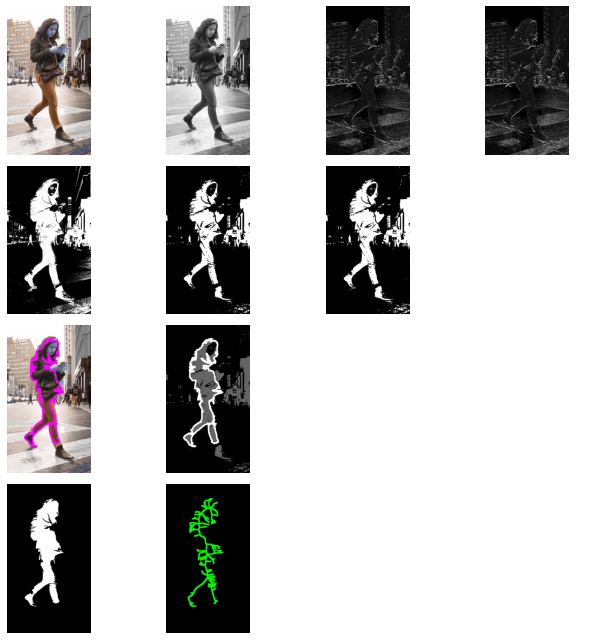

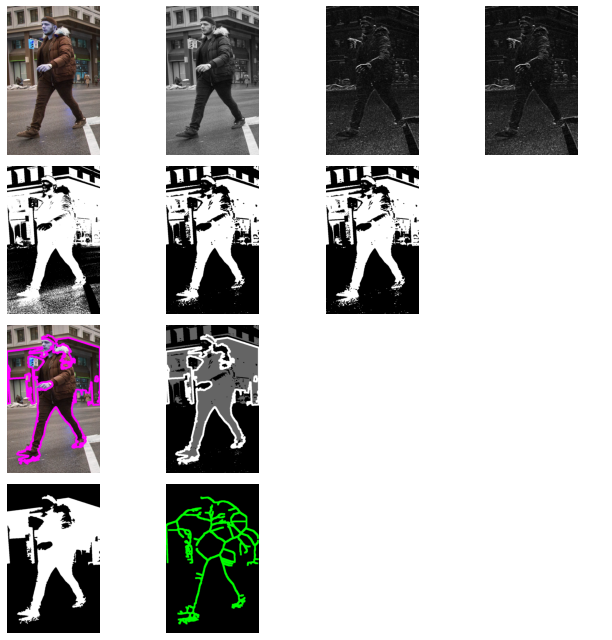

In [114]:
def makeBinaryMask(imageName):
    ## Initial image and simple filters
    image = cv2.imread(image_name, cv2.COLOR_RGB2BGR)
    image_initial = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = image.copy()
    mask_x = np.array([-1,1])
    mask_y = mask_x.T
    K_0 = np.ones((4,4), dtype='uint8')
    image_Ix = image_gray.copy()
    image_Ix = cv2.filter2D(image_Ix, -1, mask_x)
    image_Ix = cv2.dilate(image_Ix, K_0)
    image_Iy = image_gray.copy()
    image_Iy = cv2.filter2D(image_Iy, -1, mask_y)
    image_Iy = cv2.dilate(image_Iy, K_0)


    ## Binary images
    _, image = cv2.threshold(image, 99, 100, cv2.THRESH_BINARY_INV) # change of 99, 100 to 79, 80 makes 'he' better but 'she' worse
    image_binary = image.copy()
    K_1 = np.ones((4,4), dtype='uint8')
    image = cv2.erode(image, K_1)
    # image = cv2.erode(image, K_1)
    # K_1b = np.ones((8,8), dtype='uint8')
    # image = cv2.dilate(image, K_1b)
    # K_1a = np.ones((2,2), dtype='uint8')
    # image = cv2.erode(image, K_1a)
    image_binary_erode = image.copy()
    K_1c = np.ones((2,2), dtype='uint8')
    image = cv2.dilate(image, K_1c)
    # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, (22,22))
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, (12,12))
    image_binary_erode_dilate = image.copy()


    ## Contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]
    image_binary_erode_dilate_contours = image.copy()
    image_binary_erode_dilate_contours = cv2.drawContours(image_binary_erode_dilate_contours, [biggest_contour], -1, (255,0,255), 10)
    image_contours = image_initial.copy()
    image_contours = cv2.drawContours(image_contours, [biggest_contour], -1, (255,0,255), 10)


    ## Binary mask and skeletonization
    binary_mask = np.zeros(image_initial.shape, dtype='uint8')
    cv2.drawContours(binary_mask, [biggest_contour], -1, (255,255,255), thickness=cv2.FILLED)
    from skimage.morphology import skeletonize, thin
    skeleton_mask = (binary_mask == 255)
    image_mask_skeletonize = skeletonize(skeleton_mask)
    K_2 = np.ones((10,10), dtype='uint8')
    image_mask_skeletonize = cv2.dilate(image_mask_skeletonize, K_2)


    ## Show results
    f, axs = plt.subplots(4, 4, figsize=(9, 9))
    axs[0,0].imshow(image_initial)
    axs[0,0].axis('off')
    axs[0,1].imshow(image_gray, cmap='gray')
    axs[0,1].axis('off')
    axs[0,2].imshow(image_Ix, cmap='gray')
    axs[0,2].axis('off')
    axs[0,3].imshow(image_Iy, cmap='gray')
    axs[0,3].axis('off')

    axs[1,0].imshow(image_binary, cmap="gray")
    axs[1,0].axis('off')
    axs[1,1].imshow(image_binary_erode, cmap="gray")
    axs[1,1].axis('off')
    axs[1,2].imshow(image_binary_erode_dilate, cmap="gray")
    axs[1,2].axis('off')
    # axs[1,3].
    axs[1,3].axis('off')

    axs[2,0].imshow(image_contours)
    axs[2,0].axis('off')
    axs[2,1].imshow(image_binary_erode_dilate_contours, cmap='gray')
    axs[2,1].axis('off')
    # axs[2,2].
    axs[2,2].axis('off')
    # axs[2,3].
    axs[2,3].axis('off')

    axs[3,0].imshow(binary_mask)
    axs[3,0].axis('off')
    axs[3,1].imshow(image_mask_skeletonize)
    axs[3,1].axis('off')
    # axs[3,2].
    axs[3,2].axis('off')
    # axs[3,3].
    axs[3,3].axis('off')

    f.tight_layout()

image_nr = 10
image_name = "images/" + image_list[image_nr]
makeBinaryMask(image_name)

image_nr = 11
image_name = "images/" + image_list[image_nr]
makeBinaryMask(image_name)